<a href="https://colab.research.google.com/github/hdnsameera/CIS-7017/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# @title Mount Google Drive to colab
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
# Create a folder in the root directory to store dataset
#!mkdir -p "/content/drive/MyDrive/Dissertation/Data"

In [8]:
# Import pandas, ydata_profiling libraries
import pandas as pd
from ydata_profiling import ProfileReport

In [183]:
# @title Reading the dataset into pandas dataframe
df = pd.read_csv('drive/MyDrive/Dissertation/Data/cell2celltrain.csv')

In [249]:
# @title Data exploration


In [184]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [185]:
# The 'CustomerID' is not important.
df.drop('CustomerID', axis=1, inplace=True)
df.dtypes

Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                     float64
H

In [228]:
# Check for unique values in dtype 'object'

def showUniqueValues():
  for column in df:
    if df[column].dtype =='object':
      print(f'{column} : {df[column].unique()}')

showUniqueValues()

Churn : ['Yes' 'No']
ServiceArea : ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'NNYROC716' 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602'
 'NNYBUF716' 'DETTOL419' 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'SEABLV425'
 'MIAMIA305' 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812'
 'MIADEL561' 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYCNAS516' 'NSHCOL615'
 'PITGRE412' 'SE

In [ ]:
# @title Data preprocessing


In [245]:
# HandsetPrice should be numeric. A value as 'Unknown' is assigned in the column.
# Get the number of observations where the 'Unknown' value is assigned.
pd.to_numeric(df.HandsetPrice, errors='coerce').isnull().sum()

28982

In [ ]:
# Since there are observations with 'Unknown' value more than the half of the dataset, these observations cannot be dropped.
# HandsetPrice should be numeric. A value as 'Unknown' is assigned in the column. Convert the values from char to numeric ignoring the 'Unknown' values.
df[pd.to_numeric(df.HandsetPrice, errors='coerce').isnull()].shape

In [239]:
df[df.HandsetPrice == 'Unknown'].HandsetPrice

2        Unknown
28       Unknown
36       Unknown
38       Unknown
43       Unknown
          ...   
51033    Unknown
51035    Unknown
51037    Unknown
51039    Unknown
51040    Unknown
Name: HandsetPrice, Length: 28982, dtype: object

In [194]:
# Show the number of columns and rows
df.shape

(51047, 57)

In [ ]:
# Show all of the columns
df.columns.values

In [192]:
# Check for missing data or NA values
df.isna().sum()

Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       909
AgeHH2    

In [187]:
# Show some statistics
df.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [160]:
df['Churn'].value_counts()

1.0    249999
0.0    190833
Name: Churn, dtype: int64

In [161]:
# Visualize the count of customer churn
%matplotlib inline
import matplotlib.pyplot as plt

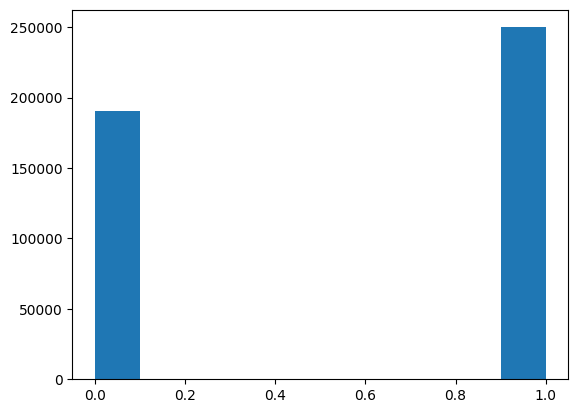

In [162]:
fig, ax = plt.subplots()
#ax.plot(df['Churn']);
ax.hist(df['Churn']);

In [163]:
import sklearn
import seaborn as sns

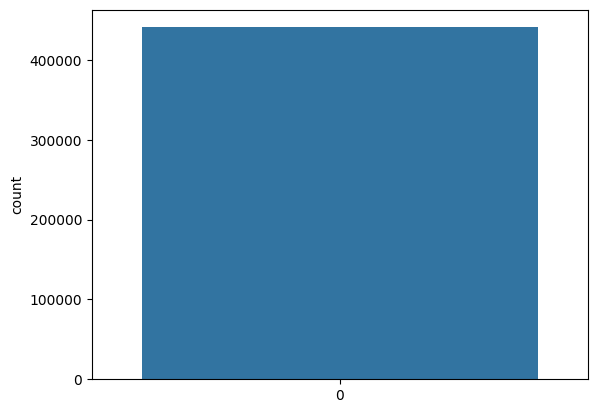

In [164]:
sns.countplot(df['Churn']);

In [165]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [166]:
# Function to analyze customer churn vs other features

def churnHist(colName):
  churn_yes = df[df.Churn==1.0][colName]
  churn_no = df[df.Churn==0.0][colName]

  plt.hist([churn_yes, churn_no], color=['red','purple'], label=['1.0=Yes','0.0=No'])
  plt.legend()

  plt.xlabel(colName)
  plt.ylabel('Number of customers')
  plt.title(f'Customer churn vs {colName} analysis');


In [167]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [168]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

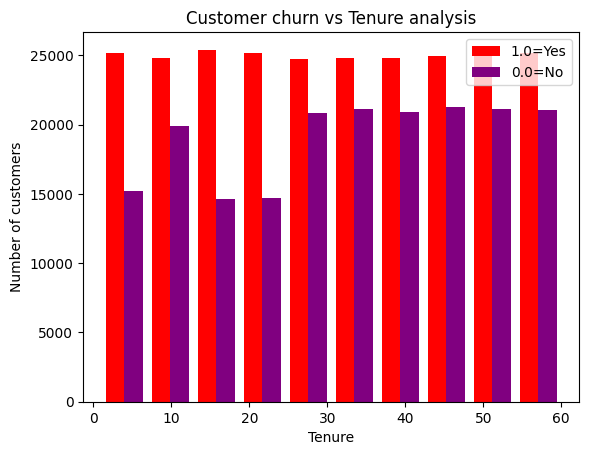

In [171]:
churnHist('Tenure')

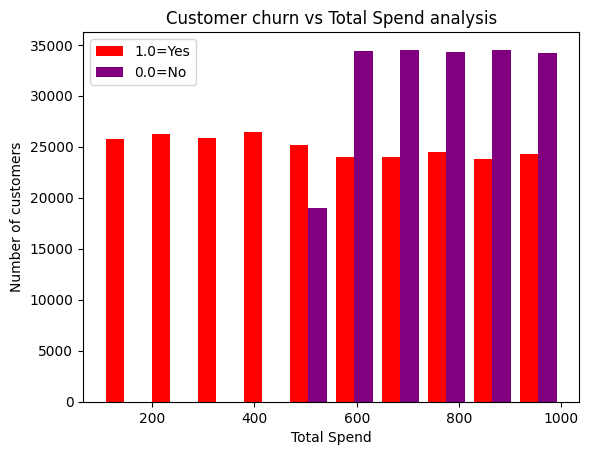

In [172]:
churnHist('Total Spend')

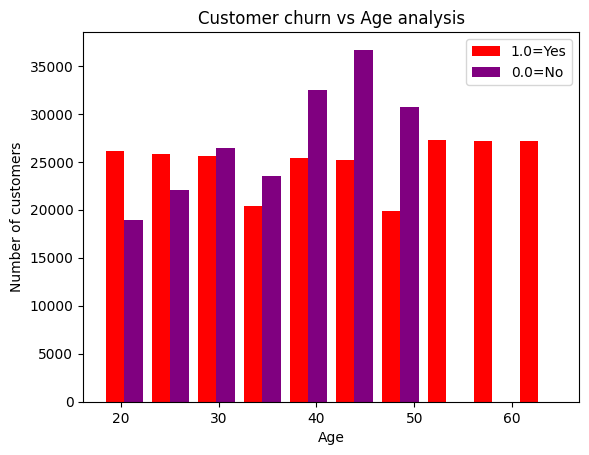

In [173]:
churnHist('Age')

In [176]:
for column in df:
  print(column)

CustomerID
Age
Gender
Tenure
Usage Frequency
Support Calls
Payment Delay
Subscription Type
Contract Length
Total Spend
Last Interaction
Churn


In [ ]:
# Install pandas profiling report library
!pip install -U ydata-profiling

In [ ]:
# Create pandas profiling report
report = ProfileReport(df)

# Download pandas profiling report in html format
report.to_file('Row Data Analysis.html')

# View pandas profiling report (This will take a few minutes to load the report)
report